In [1]:
train_dir = "../Images_data/training_test_reduced/training_set"
test_dir = "../Images_data/training_test_reduced/test_set"

Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


c:\venv\ilumpy-VS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,164,771 (8.26 MB)

 Trainable params: 2,164,771 (8.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


c:\venv\ilumpy-VS\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.3241 - loss: 1.8698
Epoch 1: val_accuracy improved from -inf to 0.51667, saving model to saved_models/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 805ms/step - accuracy: 0.3289 - loss: 1.8416 - val_accuracy: 0.5167 - val_loss: 1.0508 - learning_rate: 0.0010
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.5015 - loss: 0.9708
Epoch 2: val_accuracy improved from 0.51667 to 0.65333, saving model to saved_models/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 618ms/step - accuracy: 0.5026 - loss: 0.9697 - val_accuracy: 0.6533 - val_loss: 0.8197 - learning_rate: 0.0010
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6078 - loss: 0.7772
Epoch 3: val_accuracy improved from 0.65333 to 0.69000, saving model to saved_models/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 603ms/step - accuracy: 0.6113 - loss: 0.7709 - val_accuracy: 0.6900 - val_loss: 0.5759 - learning_rate: 0.0010
Epoch 4/25
10/10 ━━━━━━━━━

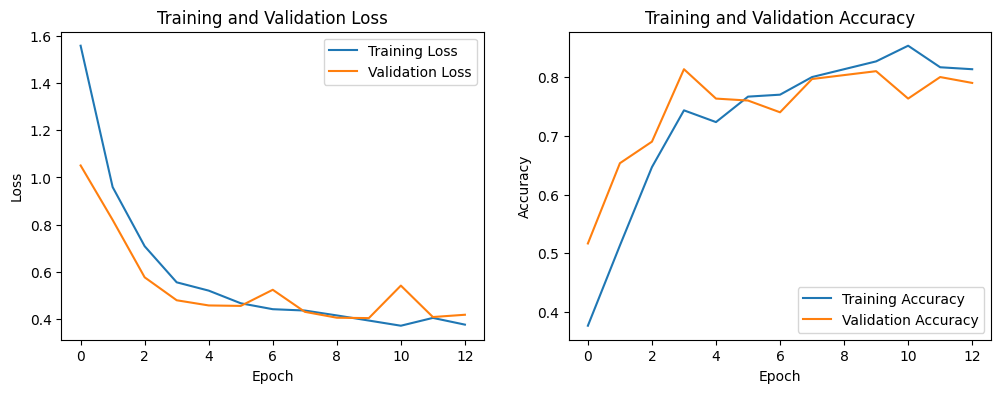

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 351ms/step


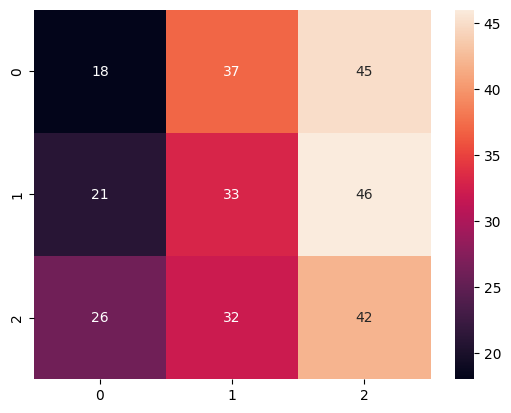

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, LearningRateScheduler
import math

# Set up the directories
train_dir = "../Images_data/training_test_reduced/training_set"
test_dir = "../Images_data/training_test_reduced/test_set"
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

# Define the model
drop=0.25
kernel_initializer = 'he_uniform'

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(drop),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(drop),

    Flatten(),
    Dense(512, activation='relu', kernel_initializer=kernel_initializer),
    Dropout(drop),
    Dense(3, activation='softmax')  # Changed output layer to 3 units
])

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Callbacks
checkpoint = ModelCheckpoint('saved_models/best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
log_csv = CSVLogger('saved_logs/my_logs.csv', separator=',', append=False)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * math.exp(-0.1)

callbacks_list = [checkpoint, early_stop, log_csv, LearningRateScheduler(scheduler)]

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

# Evaluate the model
_, test_acc = model.evaluate(validation_generator)
print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)

# Predicting the Test set results
y_pred_test = model.predict(validation_generator)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = validation_generator.classes

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ground_truth, prediction_test)

sns.heatmap(cm, annot=True)
plt.show()
